<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(_4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-4_n250.csv',
 'data_multi_delta_-4_n120.csv',
 'data_multi_delta_-4_n60.csv',
 'data_multi_delta_-4_n30.csv',
 'data_multi_delta_-4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,20.805870,44.605810,73.065029,74.728750,2.777831e-04,223.205736,223.205229,0.000507
1,0.0,1.0,70.032376,45.378586,96.489286,38.153906,7.259248e-04,260.054880,260.053857,0.001023
2,0.0,2.0,42.406682,50.279849,23.822192,83.539036,4.649534e-04,210.048224,210.047731,0.000493
3,0.0,3.0,88.825619,65.429236,96.464485,21.249873,-8.194018e-05,281.969131,281.969031,0.000100
4,0.0,4.0,39.406074,20.481329,82.955553,52.996201,1.839552e-03,205.840996,205.838732,0.002264
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,47.531161,84.201200,69.442045,71.359649,8.179611e-07,282.534056,282.534069,-0.000013
119996,999.0,116.0,79.723914,40.019559,53.363941,83.819838,-2.520119e-04,266.926999,266.927240,-0.000241
119997,999.0,117.0,31.239491,94.590191,53.941760,90.540896,-5.381932e-05,280.312284,280.312350,-0.000066
119998,999.0,118.0,35.696064,84.431941,25.918412,75.295714,1.032345e-04,231.342235,231.342175,0.000060


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,20.805870,44.605810,73.065029,74.728750,2.777831e-04,223.205736,223.205229,0.000507
1,0.0,1.0,70.032376,45.378586,96.489286,38.153906,7.259248e-04,260.054880,260.053857,0.001023
2,0.0,2.0,42.406682,50.279849,23.822192,83.539036,4.649534e-04,210.048224,210.047731,0.000493
3,0.0,3.0,88.825619,65.429236,96.464485,21.249873,-8.194018e-05,281.969131,281.969031,0.000100
4,0.0,4.0,39.406074,20.481329,82.955553,52.996201,1.839552e-03,205.840996,205.838732,0.002264
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,47.531161,84.201200,69.442045,71.359649,8.179611e-07,282.534056,282.534069,-0.000013
119996,999.0,116.0,79.723914,40.019559,53.363941,83.819838,-2.520119e-04,266.926999,266.927240,-0.000241
119997,999.0,117.0,31.239491,94.590191,53.941760,90.540896,-5.381932e-05,280.312284,280.312350,-0.000066
119998,999.0,118.0,35.696064,84.431941,25.918412,75.295714,1.032345e-04,231.342235,231.342175,0.000060


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4             e  \
rep   index                                                             
0.0   0.0    20.805870  44.605810  73.065029  74.728750  2.777831e-04   
      1.0    70.032376  45.378586  96.489286  38.153906  7.259248e-04   
      2.0    42.406682  50.279849  23.822192  83.539036  4.649534e-04   
      3.0    88.825619  65.429236  96.464485  21.249873 -8.194018e-05   
      4.0    39.406074  20.481329  82.955553  52.996201  1.839552e-03   
...                ...        ...        ...        ...           ...   
999.0 115.0  47.531161  84.201200  69.442045  71.359649  8.179611e-07   
      116.0  79.723914  40.019559  53.363941  83.819838 -2.520119e-04   
      117.0  31.239491  94.590191  53.941760  90.540896 -5.381932e-05   
      118.0  35.696064  84.431941  25.918412  75.295714  1.032345e-04   
      119.0  98.873581  93.018143  42.602136  73.114584 -1.032806e-04   

                      Y       y_hat     e_hat  
rep   index                                    
0.0   0.0    223.205736  223.205229  0.000507  
      1.0    260.054880  260.053857  0.001023  
      2.0    210.048224  210.047731  0.000493  
      3.0    281.969131  281.969031  0.000100  
      4.0    205.840996  205.838732  0.002264  
...                 ...         ...       ...  
999.0 115.0  282.534056  282.534069 -0.000013  
      116.0  266.926999  266.927240 -0.000241  
      117.0  280.312284  280.312350 -0.000066  
      118.0  231.342235  231.342175  0.000060  
      119.0  317.608340  317.608366 -0.000026  

[120000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4             e  \
rep   index                                                             
0.0   0.0    20.805870  44.605810  73.065029  74.728750  2.777831e-04   
      1.0    70.032376  45.378586  96.489286  38.153906  7.259248e-04   
      2.0    42.406682  50.279849  23.822192  83.539036  4.649534e-04   
      3.0    88.825619  65.429236  96.464485  21.249873 -8.194018e-05   
      4.0    39.406074  20.481329  82.955553  52.996201  1.839552e-03   
...                ...        ...        ...        ...           ...   
999.0 115.0  47.531161  84.201200  69.442045  71.359649  8.179611e-07   
      116.0  79.723914  40.019559  53.363941  83.819838 -2.520119e-04   
      117.0  31.239491  94.590191  53.941760  90.540896 -5.381932e-05   
      118.0  35.696064  84.431941  25.918412  75.295714  1.032345e-04   
      119.0  98.873581  93.018143  42.602136  73.114584 -1.032806e-04   

                      Y       y_hat     e_hat  
rep   index                                    
0.0   0.0    223.205736  223.205229  0.000507  
      1.0    260.054880  260.053857  0.001023  
      2.0    210.048224  210.047731  0.000493  
      3.0    281.969131  281.969031  0.000100  
      4.0    205.840996  205.838732  0.002264  
...                 ...         ...       ...  
999.0 115.0  282.534056  282.534069 -0.000013  
      116.0  266.926999  266.927240 -0.000241  
      117.0  280.312284  280.312350 -0.000066  
      118.0  231.342235  231.342175  0.000060  
      119.0  317.608340  317.608366 -0.000026  

[120000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,20.805870,44.605810,73.065029,74.728750,2.777831e-04,223.205736,223.205229,0.000507
1,0.0,1.0,70.032376,45.378586,96.489286,38.153906,7.259248e-04,260.054880,260.053857,0.001023
2,0.0,2.0,42.406682,50.279849,23.822192,83.539036,4.649534e-04,210.048224,210.047731,0.000493
3,0.0,3.0,88.825619,65.429236,96.464485,21.249873,-8.194018e-05,281.969131,281.969031,0.000100
4,0.0,4.0,39.406074,20.481329,82.955553,52.996201,1.839552e-03,205.840996,205.838732,0.002264
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,47.531161,84.201200,69.442045,71.359649,8.179611e-07,282.534056,282.534069,-0.000013
119996,999.0,116.0,79.723914,40.019559,53.363941,83.819838,-2.520119e-04,266.926999,266.927240,-0.000241
119997,999.0,117.0,31.239491,94.590191,53.941760,90.540896,-5.381932e-05,280.312284,280.312350,-0.000066
119998,999.0,118.0,35.696064,84.431941,25.918412,75.295714,1.032345e-04,231.342235,231.342175,0.000060


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4             e  \
rep   index                                                             
0.0   0.0    20.805870  44.605810  73.065029  74.728750  2.777831e-04   
      1.0    70.032376  45.378586  96.489286  38.153906  7.259248e-04   
      2.0    42.406682  50.279849  23.822192  83.539036  4.649534e-04   
      3.0    88.825619  65.429236  96.464485  21.249873 -8.194018e-05   
      4.0    39.406074  20.481329  82.955553  52.996201  1.839552e-03   
...                ...        ...        ...        ...           ...   
999.0 115.0  47.531161  84.201200  69.442045  71.359649  8.179611e-07   
      116.0  79.723914  40.019559  53.363941  83.819838 -2.520119e-04   
      117.0  31.239491  94.590191  53.941760  90.540896 -5.381932e-05   
      118.0  35.696064  84.431941  25.918412  75.295714  1.032345e-04   
      119.0  98.873581  93.018143  42.602136  73.114584 -1.032806e-04   

                      Y       y_hat     e_hat  
rep   index                                    
0.0   0.0    223.205736  223.205229  0.000507  
      1.0    260.054880  260.053857  0.001023  
      2.0    210.048224  210.047731  0.000493  
      3.0    281.969131  281.969031  0.000100  
      4.0    205.840996  205.838732  0.002264  
...                 ...         ...       ...  
999.0 115.0  282.534056  282.534069 -0.000013  
      116.0  266.926999  266.927240 -0.000241  
      117.0  280.312284  280.312350 -0.000066  
      118.0  231.342235  231.342175  0.000060  
      119.0  317.608340  317.608366 -0.000026  

[120000 rows x 8 columns]

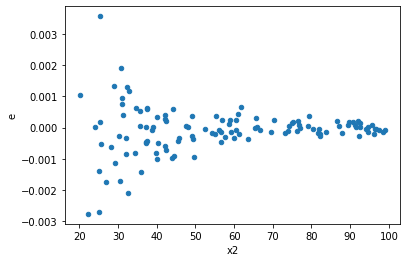

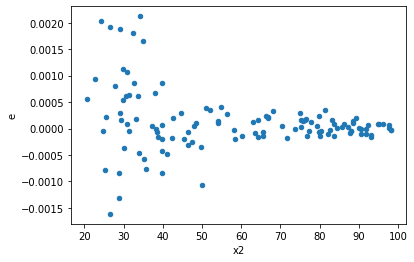

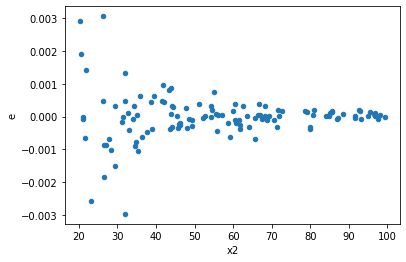

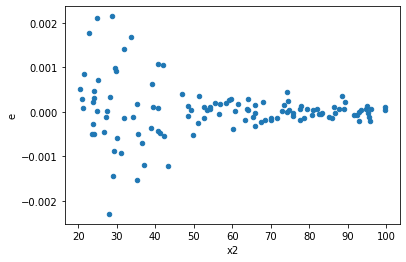

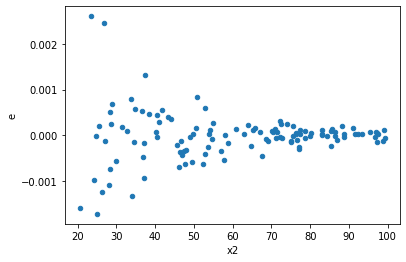

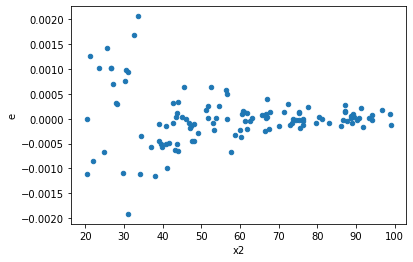

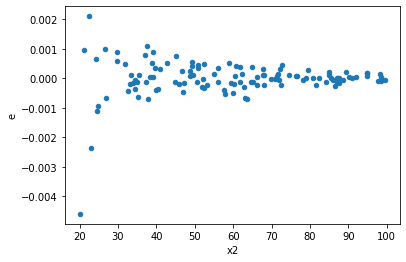

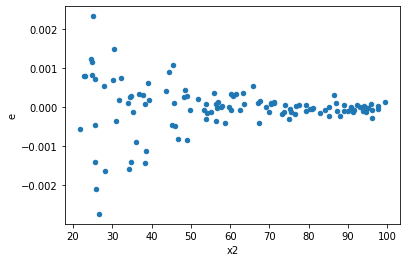

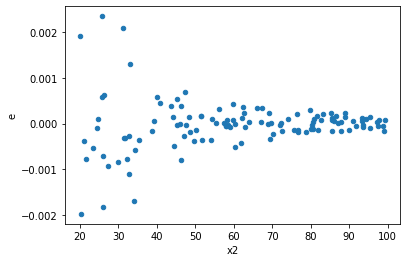

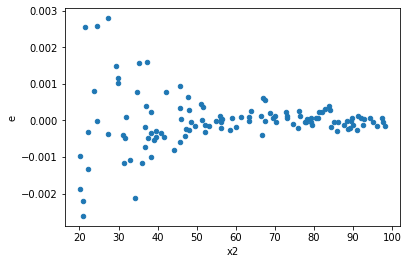

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
9.0,44.0,44.0,2.196329611047388e-05,2.274559952688257e-05,4.991658206925882e-07,5.169454437927856e-07,1.0356186709168678,0.9081138085430724,0.5459430957284638,0.4540569042715362,Reject005=1 : Homoscedasticity
28.0,44.0,44.0,1.323687921716808e-05,1.3387714304273783e-05,3.008381640265473e-07,3.0426623418804053e-07,1.011395064095627,0.9701928221553242,0.5149035889223379,0.4850964110776621,Reject005=1 : Homoscedasticity
66.0,44.0,44.0,2.6203217488223967e-05,3.7513620774337816e-05,5.955276701869084e-07,8.525822903258594e-07,1.4316417741903975,0.2379197898576486,0.8810401050711757,0.1189598949288243,Reject005=1 : Homoscedasticity
70.0,44.0,44.0,1.7913910849874447e-05,1.81722867562092e-05,4.0713433749714654e-07,4.130065171865727e-07,1.0144231992946735,0.9623336020233149,0.5188331989883426,0.48116680101165743,Reject005=1 : Homoscedasticity
191.0,44.0,44.0,1.2412866377934119e-05,1.7526363742938928e-05,2.821105994985027e-07,3.9832644870315744e-07,1.4119513744299124,0.25642669538546414,0.8717866523072679,0.12821334769273207,Reject005=1 : Homoscedasticity
208.0,44.0,44.0,9.694282361189591e-06,1.7114472697311973e-05,2.2032459911794525e-07,3.889652885752721e-07,1.7654192501993355,0.06258477072766255,0.9687076146361687,0.03129238536383128,Reject005=1 : Homoscedasticity
213.0,44.0,44.0,2.4064051380965677e-05,2.6646376655195503e-05,5.469102586583109e-07,6.055994694362614e-07,1.1073104953670605,0.7368033263982212,0.6315983368008894,0.3684016631991106,Reject005=1 : Homoscedasticity
221.0,44.0,44.0,1.645146649615973e-05,2.0602543247465906e-05,3.7389696582181205e-07,4.6823961926058874e-07,1.2523225970326208,0.4585498994567292,0.7707250502716354,0.2292749497283646,Reject005=1 : Homoscedasticity
264.0,44.0,44.0,2.7674326840859573e-05,4.657608617317794e-05,6.289619736558994e-07,1.0585474130267714e-06,1.6830070137211428,0.08776614295314844,0.9561169285234258,0.04388307147657422,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,44.0,44.0,3.9525836244354645e-05,9.678459193201144e-06,8.983144600989692e-07,2.1996498166366237e-07,0.24486412212425965,7.873626278895278e-06,Reject005=0 : Heteroscedasticity
1.0,44.0,44.0,3.125320419646926e-05,2.7814880898963776e-06,7.103000953743012e-07,6.321563840673585e-08,0.08899849347960963,4.506390723367971e-13,Reject005=0 : Heteroscedasticity
2.0,44.0,44.0,3.771144705291661e-05,8.60557059806896e-06,8.570783421117411e-07,1.9558114995611273e-07,0.22819518397142505,2.926429683386703e-06,Reject005=0 : Heteroscedasticity
3.0,44.0,44.0,2.40457810908092e-05,3.826901055919802e-06,5.464950247911182e-07,8.697502399817732e-08,0.159150623615322,1.1802671741999319e-08,Reject005=0 : Heteroscedasticity
4.0,44.0,44.0,3.4826956292066335e-05,5.679896331140948e-06,7.915217339105986e-07,1.290885529804761e-07,0.16308908201762215,1.753765946915809e-08,Reject005=0 : Heteroscedasticity
5.0,44.0,44.0,6.20919118488269e-05,4.318224098232556e-06,1.411179814746066e-06,9.814145677801263e-08,0.06954567784522389,4.2243310574912436e-15,Reject005=0 : Heteroscedasticity
6.0,44.0,44.0,2.1126195812330916e-05,8.58881361891099e-06,4.801408139166117e-07,1.952003095207043e-07,0.40654804562106156,0.003493932150748789,Reject005=0 : Heteroscedasticity
7.0,44.0,44.0,4.0339363960991345e-05,1.2380854020073843e-05,9.168037263861669e-07,2.813830459107692e-07,0.30691743261114085,0.00015015535238759373,Reject005=0 : Heteroscedasticity
8.0,44.0,44.0,2.4605689756090683e-05,5.541979493444156e-06,5.592202217293337e-07,1.259540793964581e-07,0.22523162522084317,2.427455305092289e-06,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    893
Reject005=1 : Homoscedasticity      107
Name: Result_test, dtype: int64